# Erhvervsbaseret Fordeling af Dødsfald

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_excel("datasheet.xlsx")

## Antal Døde per Erhverv
Den første kodeblok visualiserer fordelingen af dødsfald efter erhverv med fokus på de mest almindelige jobtitler og en samlet kategori for de mindre almindelige jobtitler. Den anden kodeblok fokuserer specifikt på at visualisere fordelingen af de mindre almindelige jobtitler, der ikke er blandt de fire mest almindelige.

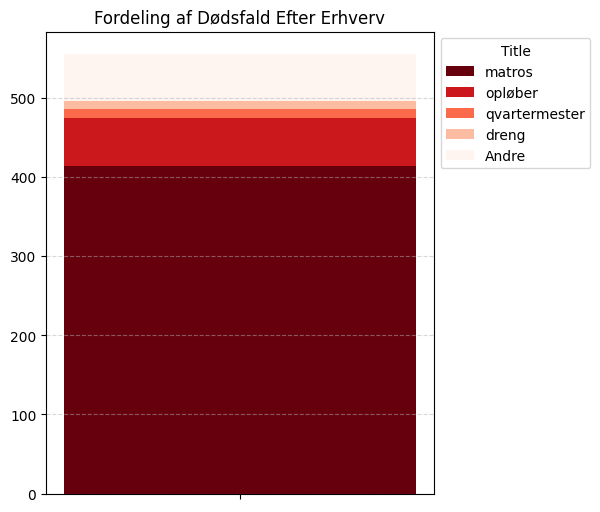

In [11]:
title_counts = df['titel'].value_counts()

top_4_titles = title_counts.head(4)
top_4_titles['Andre'] = title_counts.iloc[4:].sum()

# Farver
cmap = plt.get_cmap('Reds_r')
colors = [cmap(i / 4) for i in range(5)]

plt.figure(figsize=(5, 6))
bottom = 0
for (title, count), color in zip(top_4_titles.items(), colors):
    plt.bar(x=[''], height=[count], bottom=bottom, label=title, color=color)
    bottom += count
plt.title('Fordeling af Dødsfald Efter Erhverv')
plt.legend(title='Title', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.show()


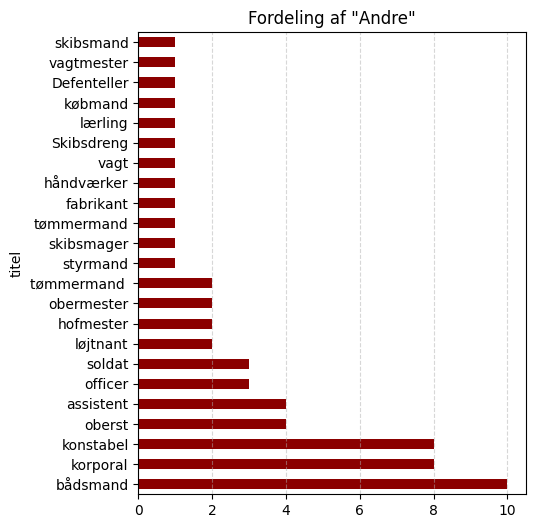

In [10]:
# Først Fjernes alle de tomme kolonner
df.columns = df.columns.str.strip()

# Nu kan der Regnes!
title_counts = df['titel'].value_counts()
top_4_titles = title_counts.head(4)

others_titles = title_counts[~title_counts.index.isin(top_4_titles.index)]

plt.figure(figsize=(5, 6))
others_titles.plot(kind='barh', color='darkred')
plt.title('Fordeling af "Andre"')
plt.grid(axis='x', linestyle='dashed', alpha=0.5)
plt.show()

## Dødelighed af Matroser i Forskellige perioder
her analysereres dødeligheden i forskellige perioder, specifikt fokuseret på matroser, og beregner procentdelen af døde matroser i forhold til det totale antal døde i hver periode. Hvorefter vi sammenligner fordelingen af jobtitler mellem desertører og afdøde individer og tester, om der er en statistisk signifikant forskel mellem disse to grupper ved hjælp af en Chi-square test.

In [8]:
df_døde = df[df['status'] == 'død']
perioder = [(1732, 1760), (1761, 1785), (1786, 1807), (1808, 1834)]
periode_labels = ['1732-1760', '1761-1785', '1786-1807', '1808-1834']

# Liste
periode_tællinger = {label: {'matroser_døde': 0, 'total_døde': 0} for label in periode_labels}
for start, slut in perioder:
    periode_label = f'{start}-{slut}'
    periode_data = df_døde[(df_døde['år'] >= start) & (df_døde['år'] <= slut)]
    periode_tællinger[periode_label]['total_døde'] = len(periode_data)
    periode_tællinger[periode_label]['matroser_døde'] = len(periode_data[periode_data['titel'] == 'matros'])

# Regn procent af døde
for periode in periode_tællinger:
    if periode_tællinger[periode]['total_døde'] > 0:
        periode_tællinger[periode]['procent_matroser_døde'] = (periode_tællinger[periode]['matroser_døde'] / periode_tællinger[periode]['total_døde']) * 100
    else:
        periode_tællinger[periode]['procent_matroser_døde'] = 0

periode_tællinger


{'1732-1760': {'matroser_døde': 62,
  'total_døde': 80,
  'procent_matroser_døde': 77.5},
 '1761-1785': {'matroser_døde': 68,
  'total_døde': 100,
  'procent_matroser_døde': 68.0},
 '1786-1807': {'matroser_døde': 160,
  'total_døde': 236,
  'procent_matroser_døde': 67.79661016949152},
 '1808-1834': {'matroser_døde': 37,
  'total_døde': 46,
  'procent_matroser_døde': 80.43478260869566}}

In [9]:
deserters = df[df['status'] == 'deserteret']
deceased = df[df['status'] == 'død']

# Titler
deserters_jobs = deserters['titel']
deceased_jobs = deceased['titel']
deserters_jobs_count = deserters_jobs.value_counts()
deceased_jobs_count = deceased_jobs.value_counts()


# kombinér til en
job_counts = pd.DataFrame({
    'Deserters': deserters_jobs_count,
    'Deceased': deceased_jobs_count
}).fillna(0).astype(int)

# Chi!
chi2, p, dof, expected = chi2_contingency(job_counts)

chi2, p, dof, expected


(20.577799537811575,
 0.7634149221344826,
 26,
 array([[1.97822142e-01, 8.02177858e-01],
        [1.97822142e-01, 8.02177858e-01],
        [5.93466425e-01, 2.40653358e+00],
        [1.97822142e+00, 8.02177858e+00],
        [1.97822142e+00, 8.02177858e+00],
        [1.97822142e-01, 8.02177858e-01],
        [3.95644283e-01, 1.60435572e+00],
        [1.97822142e-01, 8.02177858e-01],
        [1.58257713e+00, 6.41742287e+00],
        [1.58257713e+00, 6.41742287e+00],
        [1.97822142e-01, 8.02177858e-01],
        [1.97822142e-01, 8.02177858e-01],
        [3.95644283e-01, 1.60435572e+00],
        [8.15027223e+01, 3.30497278e+02],
        [1.97822142e-01, 8.02177858e-01],
        [5.93466425e-01, 2.40653358e+00],
        [5.93466425e-01, 2.40653358e+00],
        [1.18693285e+01, 4.81306715e+01],
        [2.37386570e+00, 9.62613430e+00],
        [1.97822142e-01, 8.02177858e-01],
        [1.97822142e-01, 8.02177858e-01],
        [5.93466425e-01, 2.40653358e+00],
        [1.97822142e-01, 8.02